# *Lab 11* 

## *Exercise 1*

## *Importing the packages*

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
from tqdm import tqdm
import copy
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [2]:
A = np.matrix([[1,-2], [-1,-1], [0,-1], [1,0], [1,1], [-1,0]])
b = np.array([7, -8, -4, 6, 11, 0])

##*Question: 2:*


## *Finding the feasible region of the polytope*

In [3]:
d = np.linspace(-20,30,300)
x,y = np.meshgrid(d,d)
plt.imshow(((2*y >= -7 + x) & (y >= 8 -x) & (y >= 4) & (y*0 <= 6-x) & (y <= 11-x) & (y*0 <= x + 0)).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Greens", alpha = 0.2)

## Plotting the lines defining the constraints
x = np.linspace(-20, 30, 2000)
y1 = (x-7)/2    ## For c1
y2 = -x + 8     ## For c2
y3 = (x*0) + 4  ## For c3
y5 = 11-x       ## For c5

## Making the plot
plt.plot(x, y1, label = r'C1: $x_1 - 2x_2 \leq 7$')
plt.plot(x, y2, label = r'C2: $-x_1 - x_2 \leq -8$')
plt.plot(x, y3, label = r'C3: $-x_2 \leq -4$')
plt.axvline(x=6, label = r'C4: $x_1 \leq 6$', color = 'violet')
plt.plot(x, y5, label = r"C5: $x_1 + x_2 \leq 11$")
plt.axvline(x = 0, label = r'c6: $x_1 \geq 0$', color = 'orange')
plt.xlim(-5,17)
plt.ylim(-2,15)
plt.legend(title = "Constraints", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Plotting the feasible region of the given polytope")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

The extreme points of the given polytope are as follows: $(0,8)$, $(0,11)$, $(6,4)$, $(6,5)$, $(4,4)$

The feasible region has been shaded in the above plot.



## *Question 3:*

 
>- We see that the feasible region is bounded when we consider the extra constraint $x > 0$. A rectangle that perfectly covers/encloses the given polytope can be obtained with the x-axis extending over $[0, 6]$, and y-axis extending over $[4, 11]$. 
>- To draw a point randomly from a given polytope, we first generate a point within a particular bound. We take this bound to be as small as possible so that we get required feasible points in minimum number of iterations. We can however take a larger range for generating these points, and then check for feasibility in which case many number of points might get rejected. 
The points finally obtained after feasibility check are those inside the given polytope.

## *Function to check feasibility of a point*

In [4]:
def feasibility(x):
    A = np.matrix([[1,-2], [-1,-1], [0,-1], [1,0], [1,1], [-1,0]])
    b = np.array([7, -8, -4, 6, 11, 0])
    value = np.array(np.dot(A,x)).T
    count = 0
    for i in range(value.shape[0]):
        count += (value[i] <= b[i])
    if np.sum(count) == value.shape[0]:
        return True
    else:
        return False

## *Generating a point over the interval x in (-1000,6) and y in (4,1000)*

In [5]:
def generate_pt():
    x = np.random.uniform(0, 6)
    y = np.random.uniform(4, 11)
    return np.array([x, y])

## *Generating points until a feasible pt is obtained*

In [6]:
def generate_feasible_pt():
    point = generate_pt()
    while feasibility(point) == False:
        point = generate_pt()
    return point

## *Question 4:*

In [7]:
n = 20
m = 2
d = 0.01
initial_sample = [np.array([0,0])]
while len(initial_sample) < n:
    random_pt = np.random.uniform(size = 2)
    count = 0
    for sample_pt in initial_sample:
        if np.linalg.norm(sample_pt - random_pt, 2) >= d:
            count += 1
    if count == len(initial_sample):
        initial_sample.append(random_pt)

## *Question 5:*


## *Defining the algorithm*

In [8]:
def sampling_algo(initial, max_iter):
    initial_pt = [i for i in initial]
    iter = 0
    while iter < max_iter:
        idx = random.choice([i for i in range(len(initial_pt))])
        xi = initial_pt[idx] 
        y = generate_feasible_pt()
        count = 0
        for pt in initial_pt:
            if (pt[0] != xi[0]) and (pt[1] != xi[1]) and (np.linalg.norm(y - pt, 2) >= d): 
                count += 1
        if count == len(initial_pt) - 1:
            initial_pt[idx] = y
            iter += 1
    return initial_pt

## *Iterating over the different max_iter values*

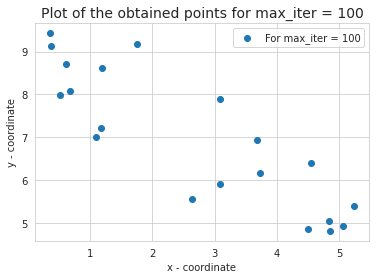

In [9]:
max_iter_list = [30, 50, 100, 200]
points = []
for i in range(len(max_iter_list)):
    points.append(sampling_algo(initial_sample, max_iter_list[i]))
    plt.scatter([pt[0] for pt in points[i]], [pt[1] for pt in points[i]], label = f"For max_iter = {max_iter_list[i]}")
    plt.legend()
    plt.title(f"Plot of the obtained points for max_iter = {max_iter_list[i]}", fontsize = 14)
    plt.xlabel("x - coordinate")
    plt.ylabel("y - coordinate")
    plt.show()

### *Comments:*
- From the plot, we observe that as max_iter increases, the number of points falling inside the feasible region increases. In case of max_iter = 30, many points fell outside the feasible region (for example, the cluster of points at the bottom left corner). However, for max_iter = 200, all the generated points fall inside the feasible region.

## *Question 6:*

We estimate the area by using the idea of "Buffon's Needle" experiment. 
>- We randomly sample some $n$ number of points within a specified range (here we consider a rectangle which ranges from 0 to 6 in the x-direction, and 4 to 11 in the y-direction). 
>- Next, we calculate how many points out of the $n$ points satisfy the feasibility criteria. Let's call it $n_f$. Thus an estimate of the probability of getting a feasible point is $\frac{n_f}{n}$.
>- Now let us suppose area of the feasible region i.e. the area of the polytope $\mathcal{P}$ is $a_p$, let the area of the rectangle be $a_r$ (= 6*7 in this case). Thus, the probability of a point falling inside the polytope is equal to 
$\frac{a_p}{a_r}$.
- Equating the 2 probabilty expressions, we get:
$\begin{align*}
\frac{a_p}{a_r} = \frac{n_f}{n} 
\implies a_p = \frac{n_f* a_r}{n}
\end{align*}$

The **estimated area of the polytope** in this case comes out to be **16.03329** units. The actual area of the polytope is 16 units.

## *Estimating the area of the polytope using rejection sampling*

In [10]:
def area_est(A, b, n):
    count = 0
    for _ in range(n):
        x = generate_pt()
        if feasibility(x) == True:
            count += 1
    area = (count/n)*6*7
    return area

size = 1000000
print(f"\033[1mArea of the feasible region estimated by rejection sampling (using sample size {size}): \033[0m", area_est(A, b, size))

Area of the feasible region estimated by rejection sampling (using sample size 1000000):  16.001202


## *Question 7:*

We know that an extreme point may be defined as a feasible point where $\geq 2$ constraints are active. Using the above result, we proceed by solving 2 equations at a time, then find whether the obtained solution is feasible or not. If the obtained solution is feasible, then we can say that the obtained point is an extreme point.


## *Function that checks the feasibility and whether it solves Ax = b for the sub matrix A and sub vector b*

In [11]:
def feasible_sol(A, b, sub_A, sub_b):
    if np.linalg.det(sub_A) != 0:
        x = np.dot(np.linalg.inv(sub_A), sub_b).T
        value = np.array(np.dot(A,x))
        count = 0
        for i in range(value.shape[0]):
            count += (value[i] <= b[i])
        if np.sum(count) == value.shape[0]:
            return x
        else:
            return None

## *Function to find extreme points of a polytope*

In [12]:
def find_extreme_pt(A, b):
    extreme_pts = []
    n = A.shape[0]
    for i in range(n-1):
        for j in range(i+1, n):
            sub_A = A[[i,j], :]
            sub_b = b[[i,j]]
            sol = feasible_sol(A, b, sub_A, sub_b)
            if sol is not None:
                extreme_pts.append(np.array(sol).flatten().tolist())
    return extreme_pts

In [13]:
extreme_pts = find_extreme_pt(A, b)
for i in range(len(extreme_pts)):
    print(f"Extreme point {i+1}: {extreme_pts[i]}")

 Extreme point 1: [4.0, 4.0]
 Extreme point 2: [0.0, 8.0]
 Extreme point 3: [6.0, 4.0]
 Extreme point 4: [6.0, 5.0]
 Extreme point 5: [0.0, 11.0]


We see that the obtained extreme points are correct, which was seen from the plot shown at the beginning.